# Lehrasib Ali 
### CC-OL-40287

# Code Clause
## Allocated Project 1
## Hand Written Digit Recognization

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### **Importing Libraries**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

### **Loading Scikit-learn Digits Dataset**

In [12]:
digits = load_digits()
X = digits.data
y = digits.target

### **Displaying Dataset from each class**

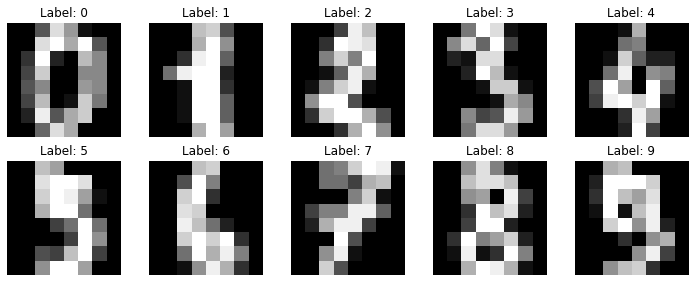

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### **Data Analysis and Exploration**

In [7]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Number of classes:", len(np.unique(y)))

Number of samples: 1797
Number of features: 64
Number of classes: 10


**Histogram of Class Distribution**

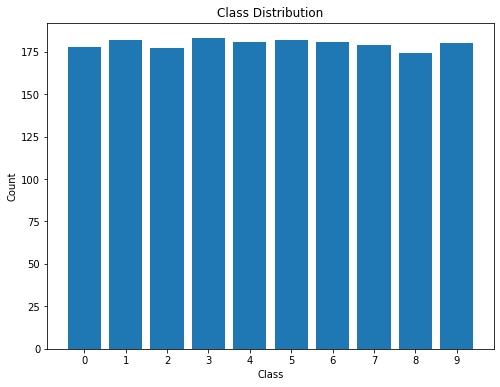

In [10]:
class_counts = np.bincount(y)
plt.figure(figsize=(8, 6))
plt.bar(range(10), class_counts, tick_label=np.arange(10))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

**Histogram of Pixels Intensity Distribution**


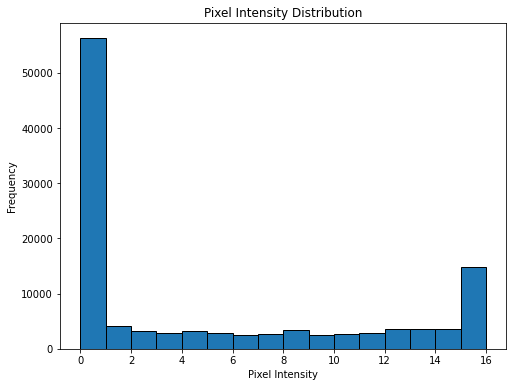

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(X.flatten(), bins=16, range=(0, 16), edgecolor='k')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

### **Splitting Data into Training & Testing Datasets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Defining Model Architecture**

In [14]:
class NeuralNetwork:
    def __init__(self):
        self.input_size = 64  # Number of input features (8x8 image size)
        self.hidden_size = 64  # Number of neurons in the hidden layer
        self.output_size = 10  # Number of output classes (0-9 digits)
        self.learning_rate = 0.1  # Learning rate for weight updates

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)

    def backward(self, X, y):
        m = X.shape[0]  # Number of training examples

        self.dz2 = self.a2
        self.dz2[range(m), y] -= 1
        self.dz2 /= m

        self.dW2 = np.dot(self.a1.T, self.dz2)
        self.db2 = np.sum(self.dz2, axis=0, keepdims=True)

        self.da1 = np.dot(self.dz2, self.W2.T)
        self.dz1 = self.da1 * self.sigmoid_derivative(self.a1)
        self.dW1 = np.dot(X.T, self.dz1)
        self.db1 = np.sum(self.dz1, axis=0, keepdims=True)

    def update_weights(self):
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            self.update_weights()

    def predict(self, X):
        self.forward(X)
        return np.argmax(self.a2, axis=1)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    @staticmethod
    def softmax(x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)


### **Creating and Training Model**

In [23]:
model = NeuralNetwork()
model.train(X_train, y_train, epochs=100000)

### **Predicting on testing data**

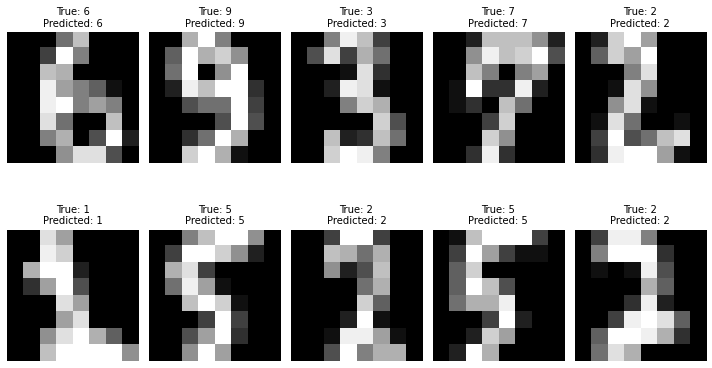

In [24]:
y_pred = model.predict(X_test)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPredicted: {y_pred[i]}", fontsize=10)
    ax.axis('off')
plt.tight_layout()
plt.show()

### **Evaluating Model's Accuracy**

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9416666666666667


### **Generating Confusion Matrix**

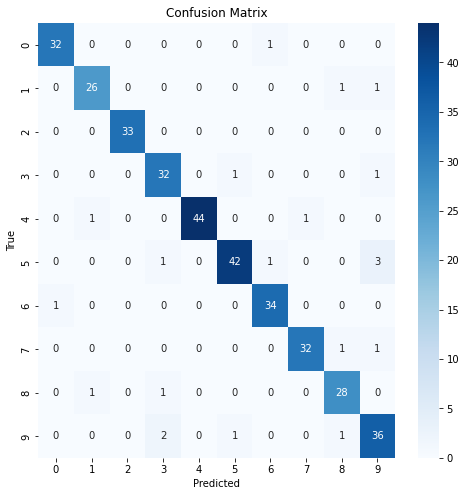

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Get class labels
classes = unique_labels(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

# Using Built-in Model

**Importing Model**

In [29]:
from sklearn.neural_network import MLPClassifier

**Creating and Training Model**

In [30]:
built_in_model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000)  # You can adjust the hidden layer sizes as per your preference
built_in_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000)

**Predicting on Testing Data**

In [33]:
y_pred = built_in_model.predict(X_test)

**Evaluating Accuracy**

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9722222222222222


**Generating Confusion Matrix**

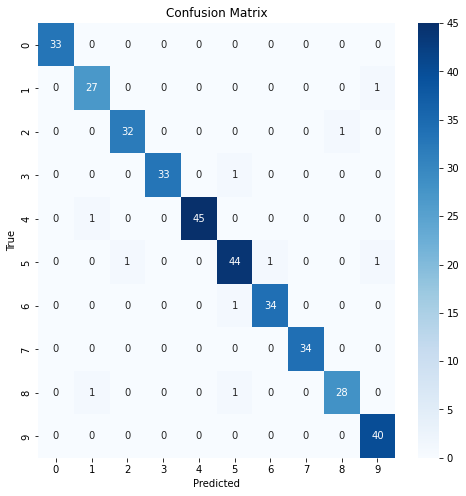

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Get class labels
classes = unique_labels(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

# **Prediction On  Hand Drawn Image**

In [37]:
import cv2
from skimage.transform import resize

**Loading Image**

(-0.5, 776.5, 663.5, -0.5)

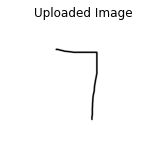

In [59]:
image = cv2.imread(r'.\\test.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Uploaded Image")
plt.axis('off')

**Preprocessing Image**

(-0.5, 7.5, 7.5, -0.5)

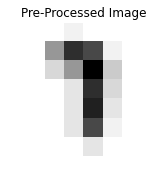

In [60]:
resized_image = resize(image, (8, 8))

# Convert the image to the same data type as the training data (float64)
rescaled_image = resized_image.astype(np.float64)

# Normalize the image pixel values to the same range as the training data (0-16)
normalized_image = (rescaled_image / rescaled_image.max()) * 16

# Flatten the image and reshape it to match the input shape of your model
image = normalized_image.flatten().reshape(1, -1)

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title("Pre-Processed Image")
plt.axis('off')

**Prediction Using Created Model**

In [61]:
prediction = model.predict(image)

# Display the predicted label
print("Predicted Label:", prediction)

Predicted Label: [7]


**Prediction Using Built-in Model**

In [62]:
prediction = built_in_model.predict(image)

# Display the predicted label
print("Predicted Label:", prediction)

Predicted Label: [2]
